# Challenge: Predicting the probability of flight delays at the airport of Santiago de Chile (SCL)

The problem consists in predicting the probability of delay of the flights that land or take off from the airport of Santiago de Chile (SCL). For that you will have a dataset using public and real data where each row corresponds to a flight that landed or took off from SCL during 2017. The following information is available for each flight:

- Fecha-I: Scheduled date and time of the flight.
- Vlo-I: Scheduled flight number.
- Ori-I: Programmed origin city code.
- Des-I: Programmed destination city code.
- Emp-I: Scheduled flight airline code.
- Fecha-O: Date and time of flight operation.
- Vlo-O: Flight operation number of the flight.
- Ori-O: Operation origin city code
- Des-O: Operation destination city code.
- Emp-O: Airline code of the operated flight.
- DIA: Day of the month of flight operation.
- MES: Number of the month of operation of the flight.
- AÑO: Year of flight operation.
- DIANOM: Day of the week of flight operation.
- TIPOVUELO: Type of flight, I =International, N =National.
- OPERA: Name of the airline that operates.
- SIGLAORI: Name city of origin.
- SIGLADES: Destination city name.

## 1. Task 1

How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?

In [1]:
# Import libraries that will be used in the notebook

import numpy as np
import pandas as pd
from datetime import datetime, date, time, timedelta

from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

### 1.1 Read the data into a pandas DataFrame

In [2]:
flights = pd.read_csv('../data/dataset_SCL.csv', 
                      header=0, 
                      dtype={'Vlo-I': str, 'Vlo-O': str},  # to handle mixed data types
                      parse_dates=['Fecha-I', 'Fecha-O'],  # read as datetime
                      infer_datetime_format=True)
flights.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


### 1.2 Main information about the `flights` DataFrame

In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

There are 68,206 rows and 18 columns. 

17 Columns do not have missing values. 

In the `Vlo-O` column (operation flight number), one value is missing. This row still can be used for analysis and modelling because only the scheduled information can be used for prediction, and the operation details are unknown at that point.

In [4]:
# Check the DataFrame for duplicate rows

flights.duplicated().value_counts()

False    68206
dtype: int64

There are no duplicate rows in the `flights' DataFrame.

### 1.3 Analysis of the DataFrame columns

#### 1.3.1 `Fecha-I` (scheduled date and time of the flight) and `Fecha-O` (date and time of flight operation)

In [5]:
# Summary statistics for scheduled datetimes

flights['Fecha-I'].describe(datetime_is_numeric=False)

C:\Users\ZLATA\AppData\Local\Temp/ipykernel_16116/1745453142.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  flights['Fecha-I'].describe(datetime_is_numeric=False)


count                   68206
unique                  53252
top       2017-07-28 13:30:00
freq                        6
first     2017-01-01 00:15:00
last      2017-12-31 23:55:00
Name: Fecha-I, dtype: object

In [6]:
# Summary statistics for operation datetimes

flights['Fecha-O'].describe(datetime_is_numeric=False)

C:\Users\ZLATA\AppData\Local\Temp/ipykernel_16116/3200430836.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  flights['Fecha-O'].describe(datetime_is_numeric=False)


count                   68206
unique                  62774
top       2017-11-05 14:51:00
freq                        5
first     2017-01-01 00:04:00
last      2018-01-01 00:12:00
Name: Fecha-O, dtype: object

Scheduled dates and times are for 2017 year only (the latest record is 2017-12-31 23:55:00).

The latest record for the operation dates and times is 2018-01-01 00:12:00 (because of flight delay).

In [7]:
# Percentage of flights when operation time is later than scheduled

len(flights['Fecha-O'] > flights['Fecha-I']) / len(flights) * 100

100.0

For all the records the operation time is later than the scheduled time. So, the difference ('Fecha-O' - 'Fecha-I') will be a positive number for all rows.

#### 1.3.2 `Vlo-I` and `Vlo-O` (scheduled and operation flight numbers)

In [8]:
# Percentage of flights where the scheduled and operation
# flight number is the same

len(flights[flights['Vlo-I'] == flights['Vlo-O']]) / len(flights) * 100

93.37448318329766

In [9]:
flights['Vlo-I'].value_counts()

174     686
11      645
116     608
150     557
704     556
       ... 
1121      1
1116      1
1065      1
1054      1
1234      1
Name: Vlo-I, Length: 584, dtype: int64

In [10]:
flights['Vlo-O'].value_counts()

174     649
11      646
116     608
150     517
704     514
       ... 
2726      1
9860      1
9858      1
1297      1
1134      1
Name: Vlo-O, Length: 861, dtype: int64

About 93% of flights had the same scheduled and operation flight number.

There are 584 unique scheduled flight numbers and 861 unique operation flight numbers. For some flight numbers, there are many records, and for some - just 1 row. Flight numbers have too many categories and probably not very suitable as a variable for prediction.

#### 1.3.3 `Ori-I` and `Ori-O` (programmed and operation origin city codes)

In [11]:
flights['Ori-I'].value_counts()

SCEL    68206
Name: Ori-I, dtype: int64

In [12]:
flights['Ori-O'].value_counts()

SCEL    68206
Name: Ori-O, dtype: int64

All values in these columns - 'SCEL'. It means the departure airport for all flights in the dataset is Santiago de Chile Airport (IATA: SCL, ICAO: SCEL). So the prediction task means predicting the probability of departure delays for the flights from SCL.

#### 1.3.4 `Des-I` and `Des-O` (programmed and operation destination city codes)

In [13]:
# Number of records per programmed destination - summary

flights['Des-I'].value_counts().describe()

count      64.000000
mean     1065.718750
std      1496.220237
min         1.000000
25%        50.000000
50%       346.000000
75%      1609.250000
max      5787.000000
Name: Des-I, dtype: float64

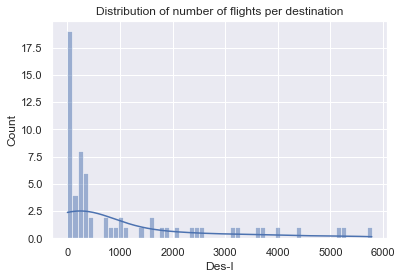

In [14]:
g = sns.histplot(flights['Des-I'].value_counts(), bins=60, kde=True)
g.set_title('Distribution of number of flights per destination');

In [15]:
# 10 Destination airports with largest number of flights

flights['Des-I'].value_counts()[:10]

SCFA    5787
SPJC    5270
SCCF    5145
SCTE    4357
SCIE    3995
SCDA    3747
SBGR    3570
SAEZ    3240
SABE    3094
SCQP    2583
Name: Des-I, dtype: int64

In [16]:
# Percentage of flights where the scheduled and operation
# destination airport is the same

len(flights[flights['Des-I'] == flights['Des-O']]) / len(flights) * 100

99.95894789314723

There 64 airports in the `Des-I` column. The number of records per destination varies from 1 to 5787. Half of the destinations have <= 346 records. 

Airports with the largest numbers of records are located in Chile, Peru, Brazil and Argentina. 

For almost all flights the programmed and operation destination airport is the same.

#### 1.3.5 `Emp-I` and `Emp-O` (scheduled and operation airline codes)

In [17]:
# Number of records per scheduled airline - summary

flights['Emp-I'].value_counts().describe()

count       30.000000
mean      2273.533333
std       7163.120100
min          1.000000
25%        123.750000
50%        343.000000
75%       1022.750000
max      37611.000000
Name: Emp-I, dtype: float64

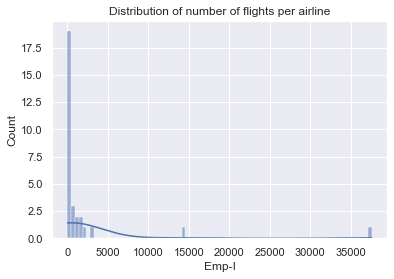

In [18]:
g = sns.histplot(flights['Emp-I'].value_counts(), bins=80, kde=True)
g.set_title('Distribution of number of flights per airline');

In [19]:
# Top 5 airlines with largest number of records

flights['Emp-I'].value_counts()[:5]

# LAN - Grupo LATAM:
# LATAM Airlines Chile (formerly LAN Airlines and LAN-Chile) is an airline based in Santiago, Chile, 
# one of the founders of LATAM Airlines Group

# SKU - Sky Airline

# TAM - Grupo LATAM: 
# (LATAM Airlines Brasil, formerly TAM Linhas Aéreas, is the Brazilian brand of LATAM Airlines Group)

# ARG - Aerolineas Argentinas

# CMP - Copa Air

LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
Name: Emp-I, dtype: int64

In [20]:
# Percentage of all records - top 5 airlines

flights['Emp-I'].value_counts()[:5] / len(flights) * 100

LAN    55.143243
SKU    20.962965
TAM     4.470281
ARG     2.857520
CMP     2.712371
Name: Emp-I, dtype: float64

In [21]:
# Percentage of flights where the scheduled and operation
# airline is the same

len(flights[flights['Emp-I'] == flights['Emp-O']]) / len(flights) * 100

72.6285077559159

There 30 airlines in the `Emp-I` column. The number of records per airline varies from 1 to 37611. Half of the airlines has <= 343 records. For two airlines the number of records is much larger than for other airlines. Flights by LAN comprise 55% of all records; the next airline is SKU (21% of all records).

For about 73% of flights the scheduled and operation airline code was the same.

#### 1.3.6 `DIA`, `MES` and `AÑO` (day of the month, number of the month and year of flight operation) 

**Day of the month**

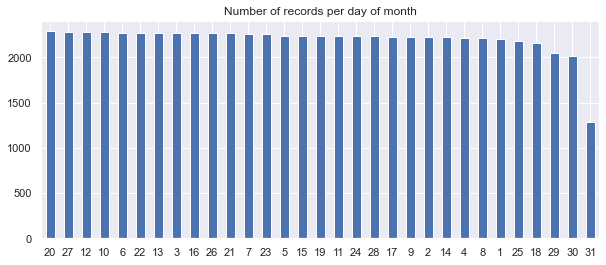

In [22]:
# Bar chart
# Sorted from higher number of records per day of month to lower

flights['DIA'].value_counts().plot(
    kind='bar', figsize=(10, 4), rot=0, 
    title='Number of records per day of month');

There are fewer records for the 31st day of month because it is present not in each month. For all other months, the number of records is very close.

**Month**

In [23]:
flights['MES'].value_counts()

12    6356
1     6108
11    6080
10    6032
7     5992
8     5744
9     5610
2     5561
3     5482
5     5240
4     5020
6     4981
Name: MES, dtype: int64

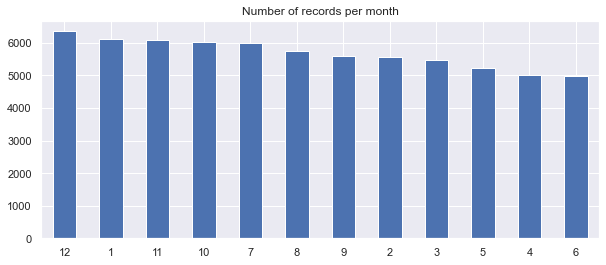

In [24]:
flights['MES'].value_counts().plot(
    kind='bar', figsize=(10, 4), rot=0, 
    title='Number of records per month');

All months are represented well. There are less flights in April, May, June than in other months.

**Year**

In [25]:
# Number of records per year

flights['AÑO'].value_counts()

2017    68204
2018        2
Name: AÑO, dtype: int64

In [26]:
# Flights with operation date in 2018

flights[flights['AÑO'] == 2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


Almost all records are for 2017. Only 2 flights have departure date in 2018 (2018-01-01), they were scheduled for 2017-12-31.

**Day of week**

In [27]:
flights['DIANOM'].value_counts()

Viernes      10292
Jueves       10251
Lunes        10131
Domingo       9796
Miercoles     9722
Martes        9662
Sabado        8352
Name: DIANOM, dtype: int64

For days of the week the data is distributed quite evenly. On Saturdays, there were little fewer flights than on other days.

The columns `DIA`, `MES`, `AÑO` and `DIANOM` have the operation information, not the scheduled details. There are 2 flights that were scheduled for 2017-12-31 and actually departed on 2018-01-01, so the value in `AÑO` is 2018.

In order to use the month and day of the week as variables for delay prediction, the new corresponding columns should be created from the scheduled datetime.

#### 1.3.7 `TIPOVUELO`: Type of flight 

I = International, N = National

In [28]:
# Number of flights per type of flight

flights['TIPOVUELO'].value_counts()

N    36966
I    31240
Name: TIPOVUELO, dtype: int64

In [29]:
# Percentage

flights['TIPOVUELO'].value_counts() / len(flights) * 100

N    54.197578
I    45.802422
Name: TIPOVUELO, dtype: float64

Dataset includes more national flights than international flights but the difference is not large.

**Note:**

I did not explore the following columns as they have info closely related to other columns about the airline, origin and destination:
- OPERA : Name of the airline that operates.
- SIGLAORI: Name city of origin.
- SIGLADES: Destination city name.